<a href="https://colab.research.google.com/github/Lakshmipathyakash/home_predicting_prices/blob/main/house_predicting_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['Price'] = california.target

# Display the first few rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
# Check for missing values
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [ ]:
# Summary statistics
print(df.describe())



             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

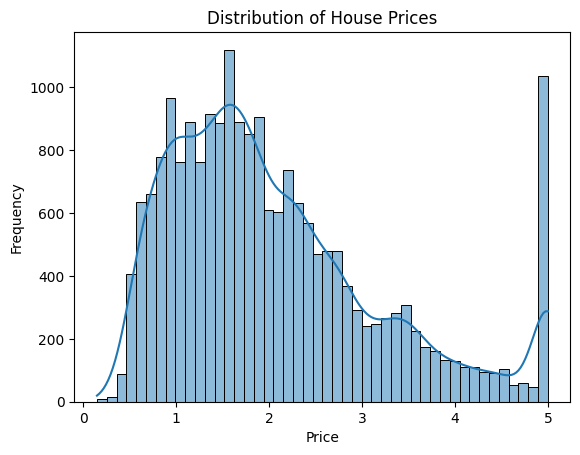

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of house prices
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


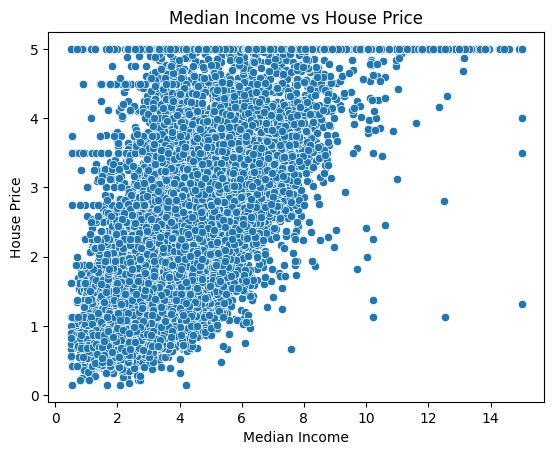

In [ ]:
# Scatter plot of 'MedInc' vs 'Price'
sns.scatterplot(x='MedInc', y='Price', data=df)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()


In [ ]:
# Features and target variable
X = df.drop('Price', axis=1)
y = df['Price']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest Mean Squared Error: 0.25549776668540763
Random Forest R-squared: 0.805024407701793


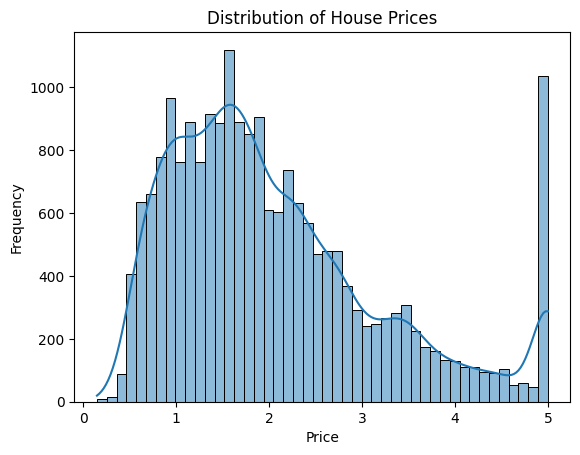

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of house prices
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


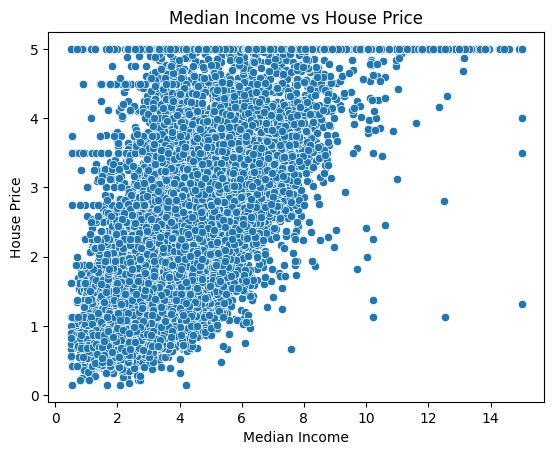

In [ ]:
# Scatter plot of 'MedInc' vs 'Price'
sns.scatterplot(x='MedInc', y='Price', data=df)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()


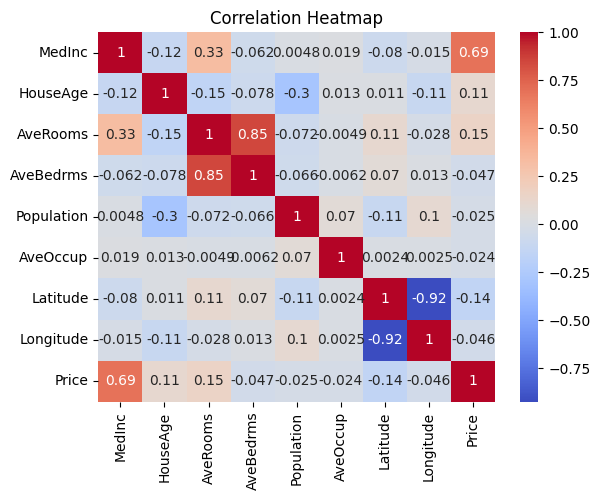

In [ ]:
# Visualize correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


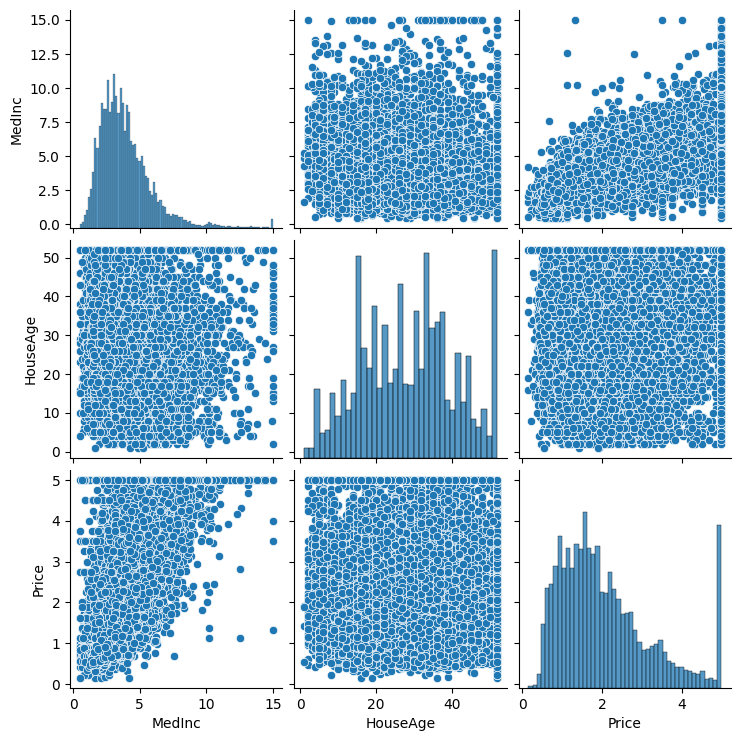

In [ ]:
# Pairplot for a quick EDA
sns.pairplot(df[['MedInc', 'HouseAge', 'Price']])  # Use relevant features
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Example metrics after model predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511
